# 安裝套件



```
!pip install deepface
```

In [15]:
!pip install deepface

In [16]:
!wget https://raw.githubusercontent.com/limin-liu-tw/datasets/refs/heads/main/FR.zip
!unzip FR.zip

--2025-08-19 05:35:36--  https://raw.githubusercontent.com/limin-liu-tw/datasets/refs/heads/main/FR.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5646677 (5.4M) [application/zip]
Saving to: ‘FR.zip’

FR.zip              100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2025-08-19 05:35:36 (52.9 MB/s) - ‘FR.zip’ saved [5646677/5646677]

Archive:  FR.zip
replace Angie_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Angie_1.jpg             
  inflating: Angie_2.jpg             
  inflating: Angie_3.jpg             
  inflating: Audrey_1.jpg            
  inflating: Audrey_2.jpg            
  inflating: Lenna_1.jpg             
  inflating: Lenna_2.jpg             
  inflating: myfont.ttf              
  inflating: unknown_p1.jpg    

In [17]:
!ls

Angie_1.jpg  Audrey_1.jpg  Lenna_1.jpg	sample_data	unknown_p3.jpg
Angie_2.jpg  Audrey_2.jpg  Lenna_2.jpg	unknown_p1.jpg
Angie_3.jpg  FR.zip	   myfont.ttf	unknown_p2.jpg


# 匯入套件，定義變數

In [19]:
from deepface import DeepFace
from retinaface import RetinaFace
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from PIL import Image
import os, warnings
warnings.filterwarnings("ignore")
font1 = FontProperties(fname = 'myfont.ttf')

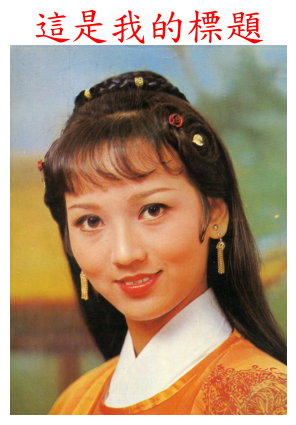

In [24]:
import matplotlib.image as mpimg
from matplotlib import font_manager as fm
font1 = fm.FontProperties(fname='myfont1.ttf', size=24)

img = mpimg.imread("Angie_1.jpg")

# Plot image
plt.imshow(img)
plt.axis("off")  # Hide axes

# Add title using the custom font
plt.title("這是我的標題", fontproperties=font1, color="red", fontsize=28)

plt.show()

# 辨識照片中的人臉

detecor_backends 可以是 ["opencv", "ssd", "dlib", "mtcnn", "retinaface"]

25-08-19 05:32:23 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 219MB/s]


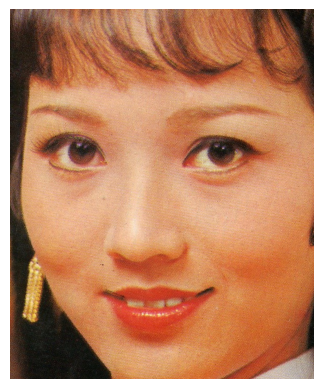

In [ ]:
faces = RetinaFace.extract_faces("Angie_1.jpg", align = True)
for face in faces:
  plt.imshow(face)
  plt.axis('off')
  plt.show()

{'x': 259, 'y': 506, 'w': 636, 'h': 774, 'left_eye': (674, 795), 'right_eye': (390, 850)}
1.0


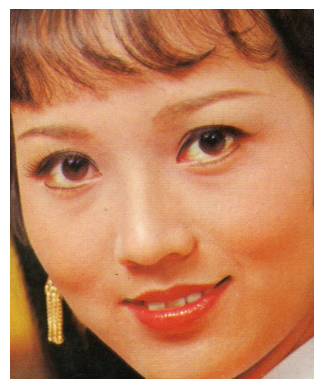

In [ ]:
faces= DeepFace.extract_faces("Angie_1.jpg",align=False,
                              detector_backend="retinaface")
for face in faces:
   img = face["face"]
   print(face["facial_area"])
   print(face["confidence"])
   plt.imshow(img)
   plt.axis('off')
   plt.show()

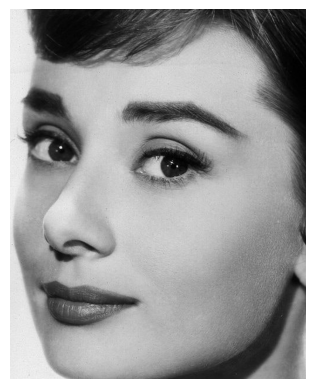

In [ ]:
faces= DeepFace.extract_faces("Audrey_1.jpg",align = False,
                              detector_backend="ssd")
for face in faces:
   plt.imshow(face["face"])
   plt.axis('off')
   plt.show()

# 兩張人臉比對

可用模型："VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"

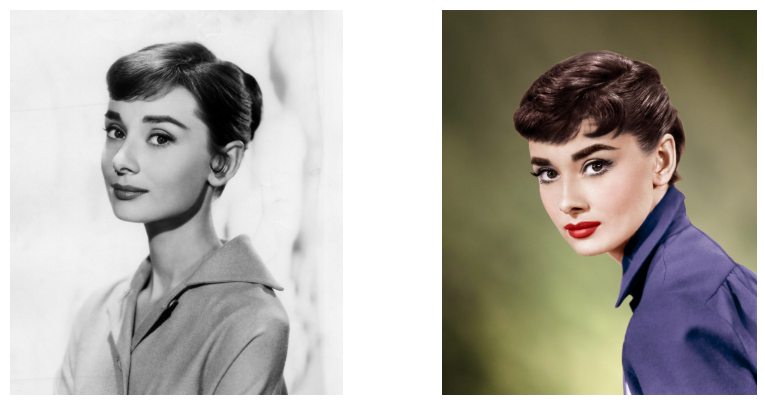

同一人:  True
距離:  0.14956049859665677
門檻:  0.4
模型:  Facenet


In [ ]:
img1, img2 = "Audrey_1.jpg", "Audrey_2.jpg"
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(img1))
axs[0].axis('off')
axs[1].imshow(Image.open(img2))
axs[1].axis('off')
plt.show()
res = DeepFace.verify(img1, img2, "Facenet")
print("同一人: ", res['verified'])
print("距離: ", res['distance'])
print("門檻: ", res['threshold'])
print("模型: ", res['model'])

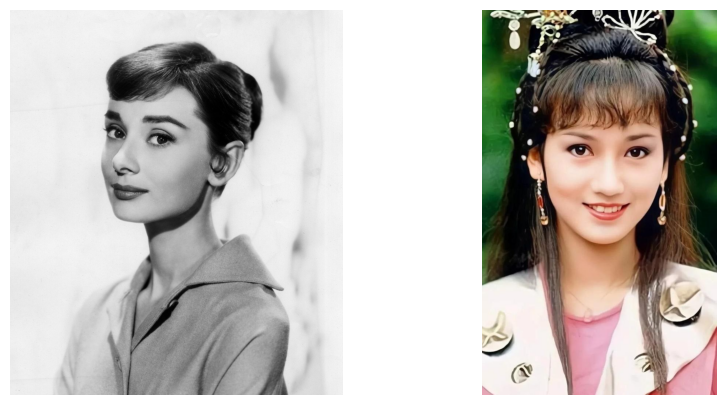

同一人:  False
距離:  0.9005709361691646


In [ ]:
img1, img2 = "Audrey_1.jpg", "Angie_2.jpg"
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(img1))
axs[0].axis('off')
axs[1].imshow(Image.open(img2))
axs[1].axis('off')
plt.show()
res = DeepFace.verify(img1, img2, "Facenet")
print("同一人: ", res['verified'])
print("距離: ", res['distance'])

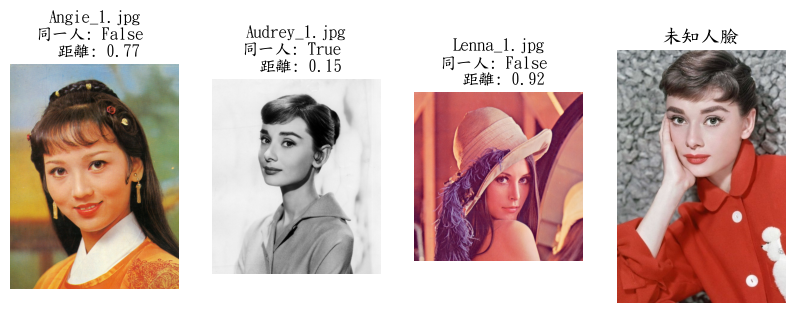

In [25]:
known_imgs = ["Angie_1.jpg", "Audrey_1.jpg", "Lenna_1.jpg"]
unknown_image, klen = "unknown_p1.jpg", len(known_imgs)
fig, axs = plt.subplots(1, klen + 1, figsize=(10, 5))

rest = []
for i, known_img in enumerate(known_imgs):
  res = DeepFace.verify(unknown_image, known_img, model_name="Facenet")
  rest.append(f"\n同一人: {res['verified']} \n 距離: {res['distance']:.2f}")

for i, img_path in enumerate(known_imgs):
  axs[i].imshow(Image.open(img_path))
  axs[i].axis('off')
  axs[i].set_title(known_imgs[i]+rest[i],fontproperties=font1, fontsize=12)
axs[klen].imshow(Image.open(unknown_image))
axs[klen].axis('off')
axs[klen].set_title("未知人臉",fontproperties=font1, fontsize=14)
plt.show()

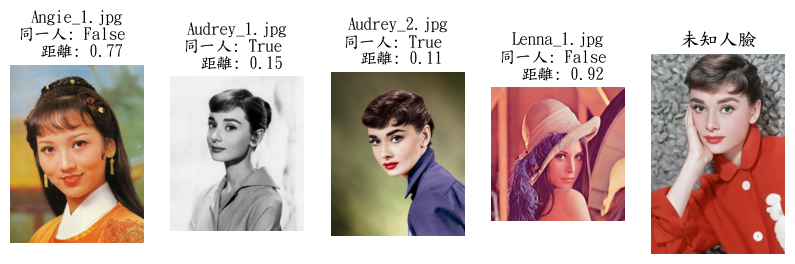

In [26]:
known_imgs=["Angie_1.jpg","Audrey_1.jpg","Audrey_2.jpg","Lenna_1.jpg"]
unknown_image, klen = "unknown_p1.jpg", len(known_imgs)
fig, axs = plt.subplots(1, klen + 1, figsize=(10, 5))

rest = []
for i, known_img in enumerate(known_imgs):
  res = DeepFace.verify(unknown_image, known_img, model_name="Facenet")
  rest.append(f"\n同一人: {res['verified']} \n 距離: {res['distance']:.2f}")

for i, img_path in enumerate(known_imgs):
  axs[i].imshow(Image.open(img_path))
  axs[i].axis('off')
  axs[i].set_title(known_imgs[i]+rest[i],fontproperties=font1, fontsize=12)
axs[klen].imshow(Image.open(unknown_image))
axs[klen].axis('off')
axs[klen].set_title("未知人臉",fontproperties=font1, fontsize=14)
plt.show()

# 人臉分析：年齡、性別、種族、情緒

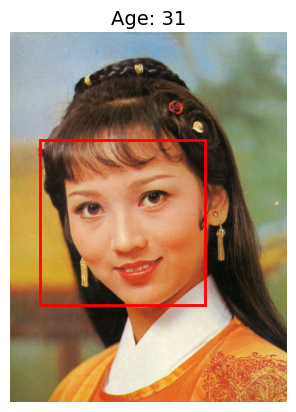

In [ ]:
imgF, acts = "Angie_1.jpg", ['age']
demography = DeepFace.analyze(imgF, actions = acts)
#print(demography)
reg = demography[0]["region"]
rect = Rectangle((reg['x'], reg['y']), reg['w'], reg['h'], lw=2, ec='red', fc='none')
img=np.asarray(Image.open(imgF))
fig, ax = plt.subplots()
ax.add_patch(rect)
ax.imshow(img)
plt.title('Age: '+ str(demography[0]["age"]), size=14)
plt.axis('off')
plt.show()

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


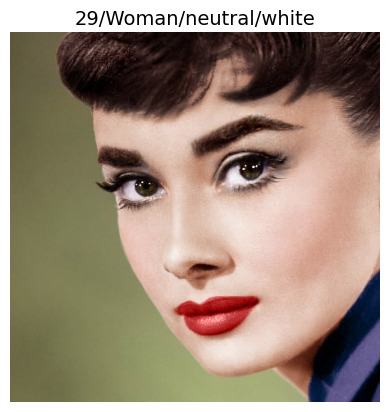

In [ ]:
imgF, acts = "Audrey_2.jpg", ['age','gender', 'race', 'emotion']
img = Image.open(imgF)
faces = DeepFace.analyze(imgF, actions = acts)
for f in faces:
   reg = f["region"]
   x, y, w, h = reg['x'], reg['y'], reg['w'], reg['h']
   tstr = str(f["age"]) +'/'+ max(f["gender"], key=f["gender"].get)+'/'+\
             f["dominant_emotion"] + '/' + f["dominant_race"]
   crop_img=img.crop((x, y, x+w, y+h))
   plt.title(tstr, size=14)
   plt.imshow(crop_img)
   plt.axis('off')
   plt.show()

Action: emotion: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]


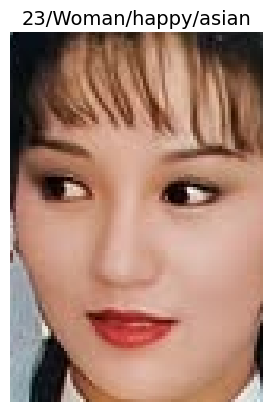

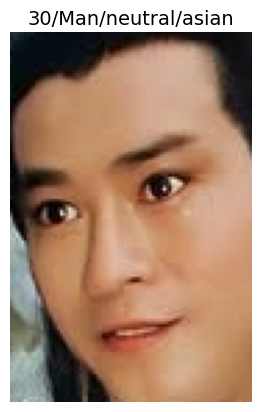

In [ ]:
imgF, acts = "Angie_3.jpg", ['age','gender', 'race', 'emotion']
img = Image.open(imgF)
faces = DeepFace.analyze(imgF, actions=acts, detector_backend="ssd")
for f in faces:
   reg = f["region"]
   x, y, w, h = reg['x'], reg['y'], reg['w'], reg['h']
   tstr = str(f["age"]) +'/'+ max(f["gender"], key=f["gender"].get)+'/'+\
             f["dominant_emotion"] + '/' + f["dominant_race"]
   crop_img=img.crop((x, y, x+w, y+h))
   plt.title(tstr, size=14)
   plt.imshow(crop_img)
   plt.axis('off')
   plt.show()